<a href="https://colab.research.google.com/github/CoAxLab/Data-Explorations/blob/main/book/exercises/resampling-methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 13:  Resampling methods

This homework assignment is designed to give you practice with bootstrapping and permutation tests.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading & Visualizing the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

(a) Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`, self reported at time of data collection), Flanker Task performance (`Flanker_Unadj`), total intracranial volume (`FS_IntraCranial_Vol`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [ ]:
# 1(a) Loading the data and creating d1
library(tidyverse)
#library (dplyr)
#library(ggplot2)

# Read in the data
data <- read.csv("/user_data/csimmon2/git_repos/Simmons_DSPN_S25/Homework datasets/hcp_data/unrestricted_trimmed_1_7_2020_10_50_44.csv")


# Create d1 with only the required variables and remove NA values
d1 <- data %>%
  select(Subject, Gender, Flanker_Unadj, FS_IntraCranial_Vol, 
         FS_Tot_WM_Vol, FS_Total_GM_Vol) %>%
  na.omit()

# Look at the first few rows
head(d1)

,Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<dbl>,<int>,<int>
2,100206,M,130.42,1864518,543134,807245
3,100307,F,112.56,1512540,407292,664124
4,100408,M,121.18,1684117,500417,726206
5,100610,M,126.53,1816044,512946,762308
6,101006,F,101.85,1437868,429449,579632
7,101107,M,107.04,1512727,416995,665024


(b) Plot grey matter volume (x axis) against intracranial volume (y axis) and Gender (point color). 

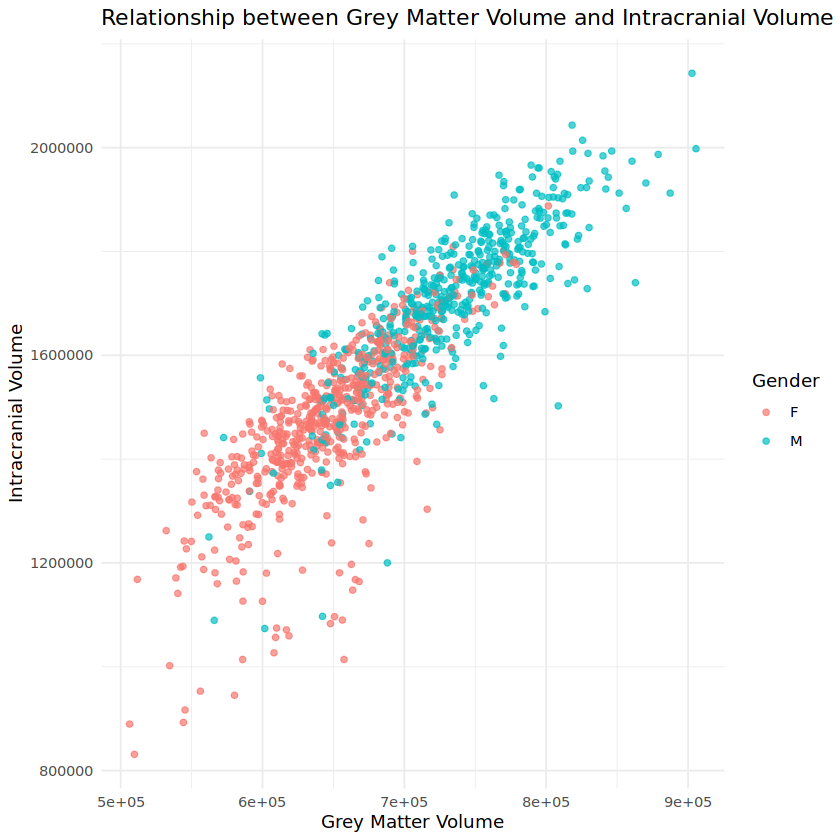

In [14]:
# 1(b) Plot grey matter volume against intracranial volume by gender
ggplot(d1, aes(x = FS_Total_GM_Vol, y = FS_IntraCranial_Vol, color = Gender)) +
  geom_point(alpha = 0.7) +
  labs(x = "Grey Matter Volume", y = "Intracranial Volume", 
       title = "Relationship between Grey Matter Volume and Intracranial Volume by Gender") +
  theme_minimal()

What patterns do you observe in the scatter plot?

> There's a positive linear relationship between grey matter volume and intracranial volume, with some clustering by gender.

---
## 2. Logistic classifier (2 points)

We want to try predicting gender using the neural data you have loaded.

(a) Run a logisic regression model to predict gender from total white matter volume, total grey matter volume, and intracranial volume. 

In [15]:
# 2(a) Run logistic regression model to predict gender
# Encoding Gender as binary (assuming M = 1, F = 0)
d1$Gender_binary <- ifelse(d1$Gender == "M", 1, 0)

# Fit the logistic regression model
model <- glm(Gender_binary ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, 
             data = d1, family = binomial())

# View summary of the model
summary(model)


Call:
glm(formula = Gender_binary ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + 
    FS_IntraCranial_Vol, family = binomial(), data = d1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7695  -0.6173  -0.1863   0.5997   3.2309  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -2.262e+01  1.347e+00 -16.787  < 2e-16 ***
FS_Tot_WM_Vol        2.140e-06  3.059e-06   0.699    0.484    
FS_Total_GM_Vol      1.959e-05  3.145e-06   6.229 4.70e-10 ***
FS_IntraCranial_Vol  5.020e-06  1.177e-06   4.263 2.01e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1534.13  on 1112  degrees of freedom
Residual deviance:  919.85  on 1109  degrees of freedom
AIC: 927.85

Number of Fisher Scoring iterations: 5


Which factors are signficantly associated with gender?

>  total grey matter volume (FS_Total_GM_Vol) and intracranial volume (FS_IntraCranial_Vol) 

(b) Estimate the prediction accuracy of your model (Note: this is the training set accuracy). Set your prediction threshold to 0.5.

In [16]:
# 2(b) Estimate prediction accuracy with threshold of 0.5
# Generate predictions
predictions <- predict(model, type = "response")

# Convert predictions to binary using threshold of 0.5
predicted_gender <- ifelse(predictions > 0.5, 1, 0)

# Calculate accuracy
accuracy <- mean(predicted_gender == d1$Gender_binary)
print(paste("Prediction accuracy:", round(accuracy * 100, 2), "%"))

[1] "Prediction accuracy: 82.03 %"


What is the prediction accuracy for gender from the full model?

> the model correctly classifies gender based on the brain volume measurements about 82% of the time

---
## 3. Bootstrapped accuracy (3 points)

Use bootstrapping to estimate the confidence intervals of the _prediction accuracy_ of your model (i.e., the confidence of the correlation between $\hat{y}$ and $y$). Plot the histogram of the bootstrapped prediction accuracies and estimate the confidence intervals off of the standard deviation from the bootstrap.


[1] "95% Confidence Interval: 79.61 % - 84.45 %"


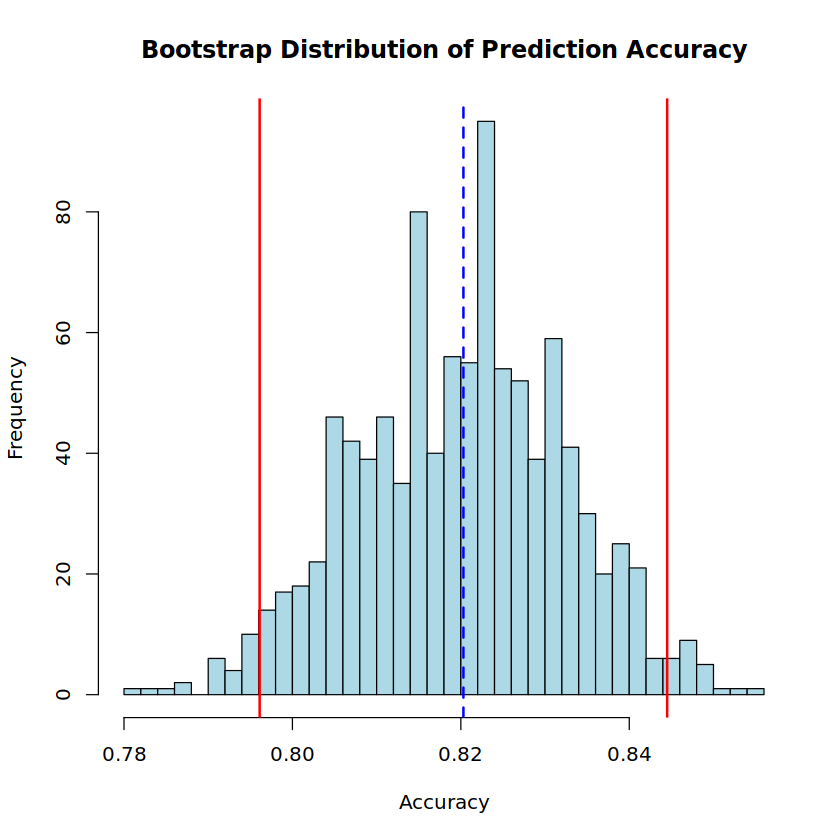

In [17]:
# 3. Bootstrapped accuracy
set.seed(123) # For reproducibility
n_bootstrap <- 1000
bootstrap_accuracies <- numeric(n_bootstrap)

for (i in 1:n_bootstrap) {
  # Sample with replacement
  boot_indices <- sample(1:nrow(d1), size = nrow(d1), replace = TRUE)
  boot_data <- d1[boot_indices, ]
  
  # Fit model on bootstrap sample
  boot_model <- glm(Gender_binary ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, 
                    data = boot_data, family = binomial())
  
  # Make predictions
  boot_predictions <- predict(boot_model, type = "response")
  boot_predicted_gender <- ifelse(boot_predictions > 0.5, 1, 0)
  
  # Calculate and store accuracy
  bootstrap_accuracies[i] <- mean(boot_predicted_gender == boot_data$Gender_binary)
}

# Plot histogram of bootstrap accuracies
hist(bootstrap_accuracies, main = "Bootstrap Distribution of Prediction Accuracy",
     xlab = "Accuracy", col = "lightblue", breaks = 30)

# Calculate confidence intervals
ci_lower <- accuracy - 1.96 * sd(bootstrap_accuracies)
ci_upper <- accuracy + 1.96 * sd(bootstrap_accuracies)

# Add lines for confidence intervals
abline(v = ci_lower, col = "red", lwd = 2)
abline(v = ci_upper, col = "red", lwd = 2)
abline(v = accuracy, col = "blue", lwd = 2, lty = 2)

# Print confidence intervals
print(paste("95% Confidence Interval:", round(ci_lower * 100, 2), "% -", round(ci_upper * 100, 2), "%"))

How robust is the prediction accuracy of the full model?

> The prediction is robust considering the fairly narrow 95% CI. Even at the lower bound, the accuracy remains close to 80%, indicating consistently good performance.

---
## 4. Permutation test for grey matter effects (3 points)

Now run a permutation test, with 1000 iterations, to evaluate how much grey matter volume contributes to the prediction accuracy. Compare the prediction accuracy of the full (unpermuted model) with the distribution of accuracies you get with a randomized grey matter volume term using a histogram (Hint: use the `abline` function to show the original accuracy on the histogram).

[1] "Permutation test p-value: 0"


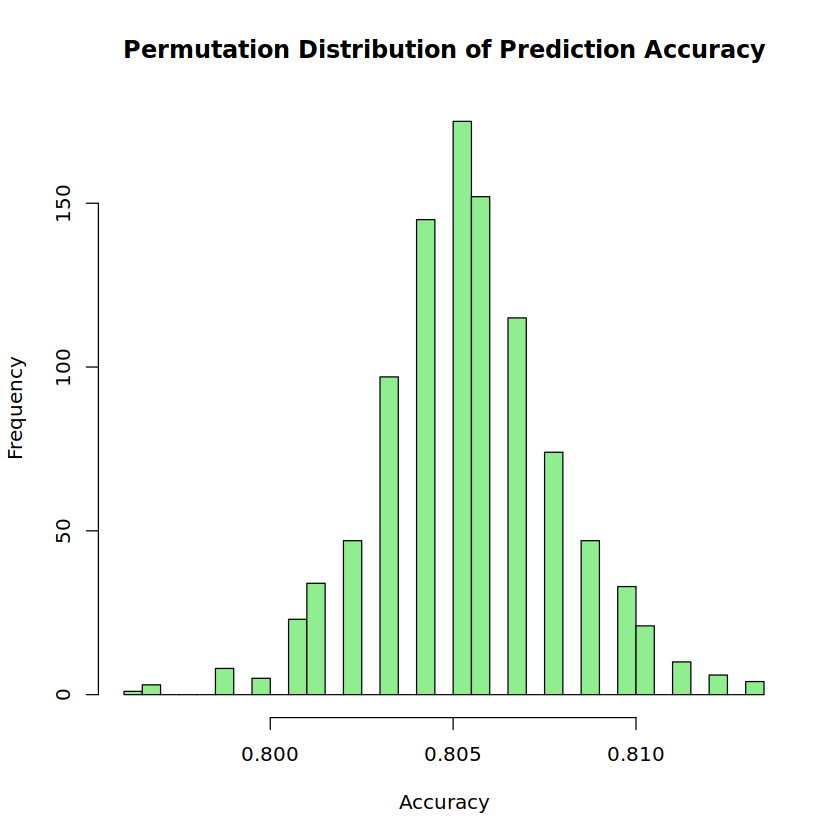

In [18]:
# 4. Permutation test for grey matter effects
set.seed(456) # For reproducibility
n_permutations <- 1000
permutation_accuracies <- numeric(n_permutations)

for (i in 1:n_permutations) {
  # Create permuted data with randomized grey matter volume
  perm_data <- d1
  perm_data$FS_Total_GM_Vol <- sample(d1$FS_Total_GM_Vol)
  
  # Fit model on permuted data
  perm_model <- glm(Gender_binary ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, 
                   data = perm_data, family = binomial())
  
  # Make predictions
  perm_predictions <- predict(perm_model, type = "response")
  perm_predicted_gender <- ifelse(perm_predictions > 0.5, 1, 0)
  
  # Calculate and store accuracy
  permutation_accuracies[i] <- mean(perm_predicted_gender == perm_data$Gender_binary)
}

# Plot histogram of permutation accuracies
hist(permutation_accuracies, main = "Permutation Distribution of Prediction Accuracy",
     xlab = "Accuracy", col = "lightgreen", breaks = 30)

# Add line for original accuracy
abline(v = accuracy, col = "red", lwd = 2)

# Calculate p-value (proportion of permutation accuracies >= original accuracy)
p_value <- mean(permutation_accuracies >= accuracy)
print(paste("Permutation test p-value:", p_value))

How much does the grey matter volume influence the prediction accuracy of the model?

> Based on the permutation test, grey matter volume has a significant influence on the prediction accuracy of the model. The permutation distribution appears to be centered around 80.5-80.6%, which is lower than the original accuracy of 82.03%. This difference of approximately 1.5 percentage points represents the unique contribution of grey matter volume to the model's predictive power after accounting for the other variables.

---
## 5. Reflection (1 point)

Differentiate the bootstrap from a permutation test. Describe each and when is it appropriate to each.

> Bootstrapping samples data with replacement to understand statistical variation while keeping relationships intact. Boost strapping is better when you want to estimate confidence intervals for a statistic. Permutation tests shuffle variables to determine if their relationship with outcomes is real or coincidental. Permutation is better when you want to assess the significance of a relationship without making assumptions about distribution.

**DUE:** 5pm EST, March 27, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*